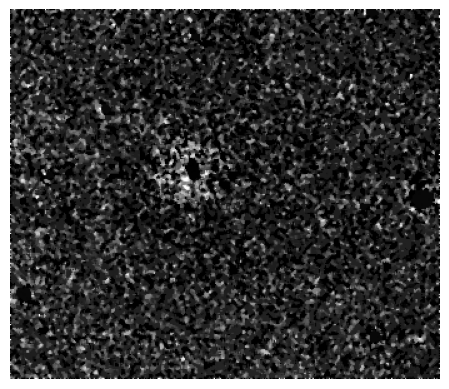

In [1]:
import cv2
from matplotlib import pyplot as plt
file_path = "/kaggle/input/task-4-dataset/Panstarrs/images/0001.png"

img = cv2.imread(file_path)
plt.imshow(img)
plt.axis('off')
plt.show()




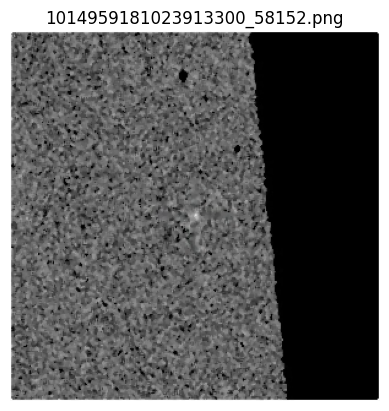

In [2]:
import random, os
image_folder = "/kaggle/input/task-4-dataset/Panstarrs/images"
img_files = [f for f in os.listdir(image_folder) if f.lower().endswith(("png","jpg"))]
random_image = random.choice(img_files)
random_image_path = os.path.join(image_folder, random_image)
img = cv2.imread(random_image_path)
plt.imshow(img)
plt.title(random_image)
plt.axis('off')
plt.show()

In [3]:
import xml.etree.ElementTree as ET

xml_file = "/kaggle/input/task-4-dataset/Panstarrs"
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    annotations = []

    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        annotations.append({
            'label' : label,
            'xmin' : xmin,
            'ymin' : ymin,
            'xmax' : xmax,
            'ymax' : ymax,
        })

    return annotations
        

In [4]:
import cv2
import matplotlib.pyplot as plt

def visualise_annotations(image_folder, annotations):
    image = cv2.imread(image_folder)
    
    for ann in annotations:
        cv2.rectangle(
            image,
            (ann['xmin'], ann['ymin']),
            (ann['xmax'], ann['ymax']),
            color = (255, 0, 0),
            thickness = 2
        )

        cv2.putText(
            image,
            ann['label'],
            (ann['xmin'], ann['ymin']-10),
            fontFace = cv2.FONT_HERSHEY_SIMPLEX,
            fontScale = 0.5,
            color = (255,0,0),
            thickness = 1
        )


    plt.imshow(image)
    plt.title(selected_image)
    plt.axis('off')
    plt.show()
            
            


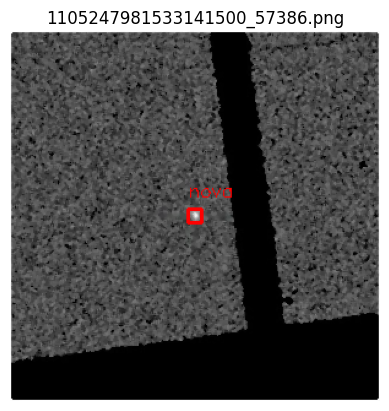

In [5]:
import os
import random

image_folder =  "/kaggle/input/task-4-dataset/Panstarrs/images"
annotation_folder = "/kaggle/input/task-4-dataset/Panstarrs/Annotations"

img_files = [f for f in os.listdir(image_folder) if f.lower().endswith(("png", "jpg"))]
selected_image = random.choice(img_files)
image_path = os.path.join(image_folder, selected_image)
xml_file = os.path.join(annotation_folder, os.path.splitext(selected_image)[0] + ".xml")

if os.path.exists(xml_file):
    annotations = parse_xml(xml_file)
    visualise_annotations(image_path, annotations)
    
    
else:
    print(f"No annotation found for {selected_image}")


 

In [6]:
!find /kaggle/input/task-4-dataset/Panstarrs -type d


/kaggle/input/task-4-dataset/Panstarrs
/kaggle/input/task-4-dataset/Panstarrs/labels
/kaggle/input/task-4-dataset/Panstarrs/Annotations
/kaggle/input/task-4-dataset/Panstarrs/images
/kaggle/input/task-4-dataset/Panstarrs/ImageSets
/kaggle/input/task-4-dataset/Panstarrs/ImageSets/Main
/kaggle/input/task-4-dataset/Panstarrs/ImageSets/Main/Main
/kaggle/input/task-4-dataset/Panstarrs/testset


In [7]:
import os

source_image_dir = "/kaggle/input/task-4-dataset/Panstarrs/images"
source_label_dir = "/kaggle/input/task-4-dataset/Panstarrs/labels"

print("Images:", len(os.listdir(source_image_dir)))
print("Labels:", len(os.listdir(source_label_dir)))


Images: 13163
Labels: 13163


In [9]:
import os
import random
import shutil
from pathlib import Path

# Paths
image_dir = Path("/kaggle/input/task-4-dataset/Panstarrs/images")
label_dir = Path("/kaggle/input/task-4-dataset/Panstarrs/labels")

output_base = Path("/kaggle/working/dataset")
image_out = output_base / "images"
label_out = output_base / "labels"

# Create dirs
for split in ["train", "val", "test"]:
    (image_out / split).mkdir(parents=True, exist_ok=True)
    (label_out / split).mkdir(parents=True, exist_ok=True)

# All image files
image_files = list(image_dir.glob("*.png"))
random.shuffle(image_files)

# Split sizes
n_total = len(image_files)
n_train = int(0.8 * n_total)
n_val = int(0.1 * n_total)

train_files = image_files[:n_train]
val_files = image_files[n_train:n_train + n_val]
test_files = image_files[n_train + n_val:]

# Function to copy pairs
def copy_pairs(file_list, split_name):
    for img_path in file_list:
        label_path = label_dir / (img_path.stem + ".txt")
        if not label_path.exists():
            continue
        shutil.copy(img_path, image_out / split_name / img_path.name)
        shutil.copy(label_path, label_out / split_name / label_path.name)

# Perform copy
copy_pairs(train_files, "train")
copy_pairs(val_files, "val")
copy_pairs(test_files, "test")

print("Split complete!")


Split complete!


In [10]:
!find /kaggle/working/dataset -type d


/kaggle/working/dataset
/kaggle/working/dataset/images
/kaggle/working/dataset/images/train
/kaggle/working/dataset/images/test
/kaggle/working/dataset/images/val
/kaggle/working/dataset/labels
/kaggle/working/dataset/labels/train
/kaggle/working/dataset/labels/test
/kaggle/working/dataset/labels/val


In [11]:
yaml_content = """
train: /kaggle/working/dataset/images/train
val: /kaggle/working/dataset/images/val

nc: 1
names: ['supernova']
"""

with open("/kaggle/working/dataset/data.yaml", "w") as f:
    f.write(yaml_content.strip())


In [12]:
with open('/kaggle/working/dataset/data.yaml', 'r') as f:
    print(f.read())


train: /kaggle/working/dataset/images/train
val: /kaggle/working/dataset/images/val

nc: 1
names: ['supernova']


In [13]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 23.9 MB/s eta 0:00:0000:01


In [15]:
from ultralytics import YOLO


model = YOLO('yolov8n.pt')  
results = model.train(
    data='/kaggle/working/dataset/data.yaml',
    epochs=50,
    patience = 7,
    imgsz=640,
    batch= 8,        
    name='supernova_yolov8',
    save=True,
    save_period = 5,
    device = 0
)


Ultralytics 8.3.102 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/dataset/data.yaml, epochs=50, time=None, patience=7, batch=8, imgsz=640, save=True, save_period=5, cache=False, device=0, workers=8, project=None, name=supernova_yolov82, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

train: Scanning /kaggle/working/dataset/labels/train.cache... 12633 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12633/12633 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/dataset/labels/val.cache... 2343 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2343/2343 [00:00<?, ?it/s]


Plotting labels to runs/detect/supernova_yolov82/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/supernova_yolov82
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.28G      1.275      1.622     0.9223          2        640: 100%|██████████| 1580/1580 [03:14<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:14<00:00,  9.96it/s]

                   all       2343       2355       0.99      0.956      0.983       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.72G     0.9329     0.5637     0.8506          1        640: 100%|██████████| 1580/1580 [03:07<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.50it/s]

                   all       2343       2355      0.993      0.961      0.989      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.72G     0.8375     0.4953      0.836          4        640: 100%|██████████| 1580/1580 [03:05<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.40it/s]

                   all       2343       2355      0.996      0.962      0.989      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.72G     0.7739     0.4579     0.8274          4        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.44it/s]

                   all       2343       2355      0.989      0.964      0.989       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.72G      0.749      0.447     0.8243          1        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.69it/s]

                   all       2343       2355      0.993      0.963       0.99      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.72G     0.6819     0.4063      0.817          0        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.55it/s]

                   all       2343       2355      0.991       0.96      0.987      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.72G     0.6326     0.3852     0.8137          4        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.52it/s]

                   all       2343       2355      0.991      0.963      0.991      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.72G     0.6244     0.3816     0.8122          2        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.60it/s]

                   all       2343       2355       0.99      0.968      0.991      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.72G     0.6231     0.3761     0.8116          1        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.51it/s]

                   all       2343       2355      0.997      0.966      0.992      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.72G     0.5802     0.3564     0.8062          1        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.45it/s]

                   all       2343       2355      0.992      0.966      0.992      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.72G     0.5656     0.3456     0.8051          1        640: 100%|██████████| 1580/1580 [03:03<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.51it/s]

                   all       2343       2355      0.989      0.969      0.992      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.72G     0.5568     0.3436     0.8026          2        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.73it/s]

                   all       2343       2355      0.993      0.964      0.992      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.72G     0.5494     0.3388     0.8039          1        640: 100%|██████████| 1580/1580 [03:03<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.69it/s]

                   all       2343       2355      0.985       0.97      0.992      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.72G     0.5401     0.3329     0.8018          4        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.67it/s]

                   all       2343       2355      0.991       0.97      0.992      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.72G     0.5205     0.3195     0.8018          1        640: 100%|██████████| 1580/1580 [03:03<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.61it/s]

                   all       2343       2355      0.987      0.976      0.993       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.72G     0.5164      0.314     0.7997          1        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.52it/s]

                   all       2343       2355      0.993      0.969      0.993      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.72G     0.5136     0.3155     0.7984          1        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.38it/s]

                   all       2343       2355      0.986      0.971      0.993      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.72G     0.5038     0.3069     0.7976          0        640: 100%|██████████| 1580/1580 [03:03<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.43it/s]

                   all       2343       2355       0.99      0.975      0.993      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.72G      0.502     0.3115     0.7967          1        640: 100%|██████████| 1580/1580 [03:04<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.66it/s]

                   all       2343       2355      0.992      0.973      0.993      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.72G     0.4914     0.2988     0.7993          1        640: 100%|██████████| 1580/1580 [03:03<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.74it/s]

                   all       2343       2355      0.992      0.974      0.993      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.72G     0.4811     0.2974     0.7958          1        640: 100%|██████████| 1580/1580 [03:03<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.73it/s]

                   all       2343       2355      0.989      0.977      0.993      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.72G     0.4762     0.2926     0.7954          1        640: 100%|██████████| 1580/1580 [03:03<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.63it/s]

                   all       2343       2355      0.993      0.972      0.993       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.72G     0.4782     0.2905     0.7992          1        640: 100%|██████████| 1580/1580 [03:03<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.53it/s]

                   all       2343       2355      0.987      0.978      0.993      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.72G     0.4717     0.2903     0.7972          1        640: 100%|██████████| 1580/1580 [03:03<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.56it/s]

                   all       2343       2355      0.991      0.976      0.994      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.72G     0.4645      0.285     0.7939          1        640: 100%|██████████| 1580/1580 [03:03<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:12<00:00, 11.51it/s]

                   all       2343       2355      0.994      0.972      0.994      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.72G     0.4534     0.2904     0.7781         16        640:   2%|▏         | 39/1580 [00:04<03:02,  8.44it/s]


KeyboardInterrupt: 

In [23]:

!ls runs/detect/supernova_yolov82/weights



best.pt  epoch0.pt  epoch10.pt	epoch15.pt  epoch20.pt	epoch5.pt  last.pt


In [24]:
from ultralytics import YOLO  
model = YOLO("runs/detect/supernova_yolov82/weights/best.pt")

In [26]:
results = model.val()

Ultralytics 8.3.102 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


val: Scanning /kaggle/working/dataset/labels/val.cache... 2343 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2343/2343 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [00:13<00:00, 10.73it/s]


                   all       2343       2355      0.988      0.979      0.994      0.945


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val2


In [29]:
!ls runs/detect/supernova_yolov82/results.csv


runs/detect/supernova_yolov82/results.csv


In [31]:
import pandas as pd

df = pd.read_csv("runs/detect/supernova_yolov82/results.csv")
print(df.columns.tolist())


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


In [32]:
df.columns = df.columns.str.strip()


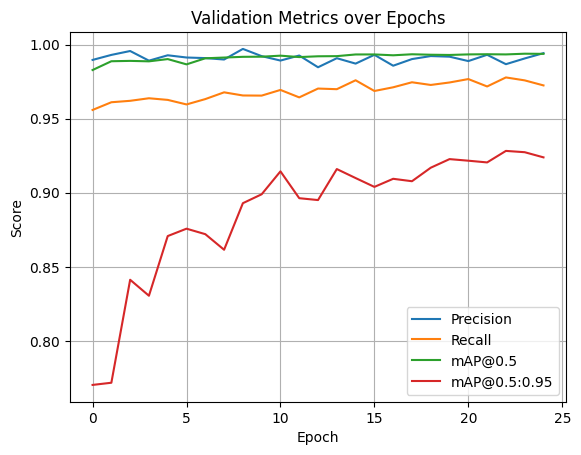

In [33]:
import matplotlib.pyplot as plt

plt.plot(df['metrics/precision(B)'], label='Precision')
plt.plot(df['metrics/recall(B)'], label='Recall')
plt.plot(df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Validation Metrics over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
from ultralytics.utils import LOGGER
LOGGER.setLevel("ERROR")


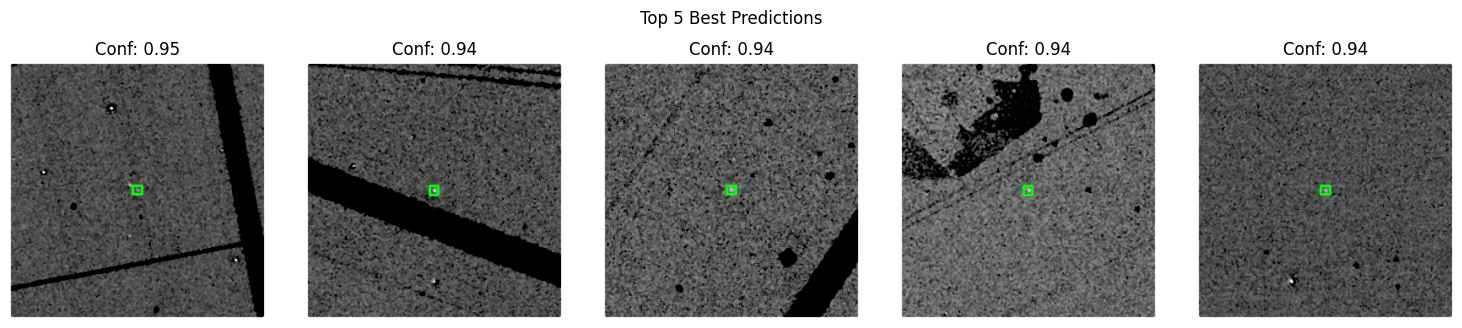

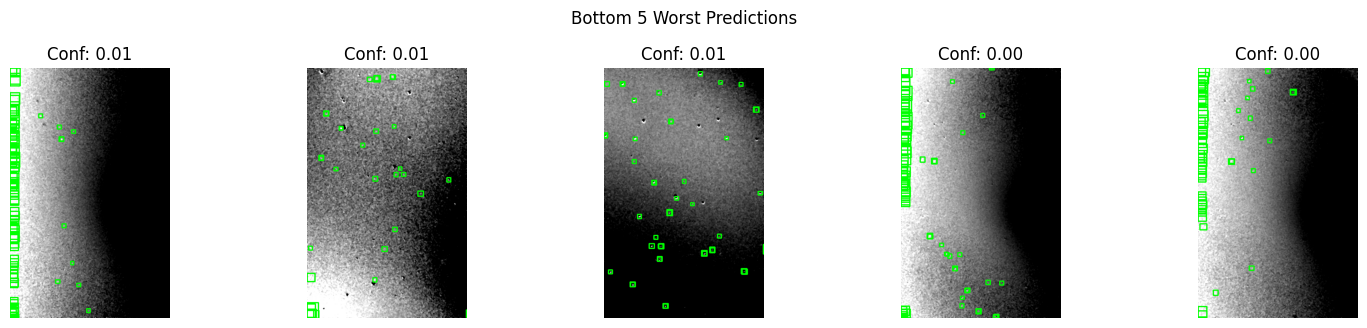

In [47]:
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load model
model = YOLO("runs/detect/supernova_yolov82/weights/best.pt")

# Get predictions with low conf threshold to include all
results = list(model.predict(
    source="/kaggle/working/dataset/images/test",
    stream=True,
    conf=0.001,
    save=False
))

# Process predictions
predictions = []

for r in results:
    # Original image
    img = r.orig_img.copy()

    # Confidence calculation
    if r.boxes is not None and len(r.boxes) > 0:
        confs = r.boxes.conf.cpu().numpy()
        mean_conf = float(np.mean(confs))
    else:
        mean_conf = 0.0

    predictions.append((mean_conf, img, r.boxes))

# Sort by confidence
sorted_preds = sorted(predictions, key=lambda x: x[0], reverse=True)

# Show predictions
def show_predictions(title, preds):
    plt.figure(figsize=(15, 6))
    for i, (conf, img, boxes) in enumerate(preds):
        img_disp = img.copy()

        # Draw boxes
        if boxes is not None:
            for box in boxes.xyxy.cpu().numpy():
                x1, y1, x2, y2 = map(int, box[:4])
                cv2.rectangle(img_disp, (x1, y1), (x2, y2), (0, 255, 0), 2)

        img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 5, i+1)
        plt.imshow(img_disp)
        plt.title(f"Conf: {conf:.2f}")
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Display Top 5 and Worst 5
show_predictions("Top 5 Best Predictions", sorted_preds[:5])
show_predictions("Bottom 5 Worst Predictions", sorted_preds[-5:])


In [49]:
from ultralytics import YOLO
model = YOLO("runs/detect/supernova_yolov82/weights/best.pt")


In [54]:
import os

for root, dirs, files in os.walk("/kaggle/working/runs/detect"):
    for file in files:
        if file.endswith(".onnx"):
            print("Found:", os.path.join(root, file))


Found: /kaggle/working/runs/detect/supernova_yolov82/weights/best.onnx


In [59]:
import os
import zipfile
import shutil

# Define paths
source_path = "/kaggle/working/runs/detect/supernova_yolov82/weights/best.onnx"
dest_path = "/kaggle/working/best.onnx"
zip_path = "/kaggle/working/best_model.zip"

# Move the file to top-level if not already there
if not os.path.exists(dest_path):
    shutil.copy(source_path, dest_path)

# Zip it
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write(dest_path, arcname='best.onnx')

print("ONNX file zipped and moved to working directory.")


ONNX file zipped and moved to working directory.
